# Rules

Here, we are going to focus graphs with the following properties:
* binary: $s(v)\in \{0,1\}$
* d-regular: $\#N(v)=d$ 
* simple: 
    * $w(e_{i,j})\in \{0,1\}$
    * $w(e_{i,i})=0$
    * $w(e_{i,j})=w(e_{j,i})$

The rules that will be considered must:
* keep these properties invariant,
* be local to a vertex and its neighborhood,
* include only one type of topology altering operation called division.

The **division** operation consists of replacing a vertex by a complete subgraph of order $d$.

The state of a vertex being either dead or alive, and there being from 0 to $d$ alive vertices in its neighborhood, there are exactly $2(d+1)$ possible **local configurations** $c(v)$. These configurations can be ordered in the following way:

$$c(v)=(d+1)\times s(v)+\sum_{v_i\in N(v)} s(v_i)$$

This ordering makes it possible to compute a **configuration vector** $\mathcal{C}$ that can be used to update the graph:

$$\mathcal{C}=\begin{pmatrix} c(v_1) \\ \vdots \\ c(v_o) \end{pmatrix}=(d+1)\times\mathcal{S}+\mathcal{A}\cdot\mathcal{S}$$

Every d-regular rule must specify, for each configuration, whether the vertex will be alive or dead at $t+1$ and whether it will have undergone a division, leading to 4 possible final states. Thus, there are $4^{2(d+1)}$ possible rules. Each rule can be described by two functions:

$$
\begin{aligned}
& R: [[0,7]]\rightarrow\{0,\, 1\} \\  
& R(c(v_t))=s(v_{t+1}) 
\end{aligned}$$
$$\begin{aligned}
& R': [[0,7]]\rightarrow\{0,\, 1\} \\  
& R'(c(v_t))=\begin{cases}\begin{array}{ll}
        1, & \text{if c leads to a division at t+1}\\
        0, & \text{otherwise}
        \end{array}\end{cases}
\end{aligned}$$

Every d-regular  rule can thus be labeled by a unique **rule number** $n$.

$$n=\sum_{i=0}^7 \left[ 2^i R(i) +  2^{i+2(d+1)} R'(i) \right]$$

This labeling system, inspired by the Wolfram code {cite}`wolfram2002new`, is such that a rule number in its binary form displays the behavior of the rule. Starting from the right, the $2(d+1)$ first digits indicate the future state for each configuration as they have been ordered previously. The $2(d+1)$ following digits show when a division occurs.


## Minimal graphs

Once a rule is defined, it is possible to search for interesting and elegant initial graphs. Here is a possible list of criteria :
* **configuration-complete**: the graph contains every possible local configuration,
* **color-symetric**: the graph stays the same under color-reversal,
* **small**: the graph contains the smallest number of vertices.

The order of such a graph must necessarily exceed by at least two the number of possible configurations. Indeed, we saw that a d-regular graph has $2(d+1)$ possible local configurations. If the graph is configuration-complete, there is an alive vertex connected to d alive vertices and another connect to none. This makes for $d+2$ alive vertices and the same goes for dead vertices. Thus, a configuration complete graph must contain at least $2(d+2)$ vertices.

The function `minimal_regular_graphs(d)` computes the list of every d-regular graphs meeting the listed criteria.

In [4]:
import gra

graphs = gra.minimal_regular_graphs(3)

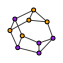

In [17]:
g0 = graphs[2]
g0.plot()

## Rules and rule plots

The `Rule` class must be provided a **degree** and a **rule number**. The `.plot()` method can be used to generate a graphical representation of a rule's action on a graph.

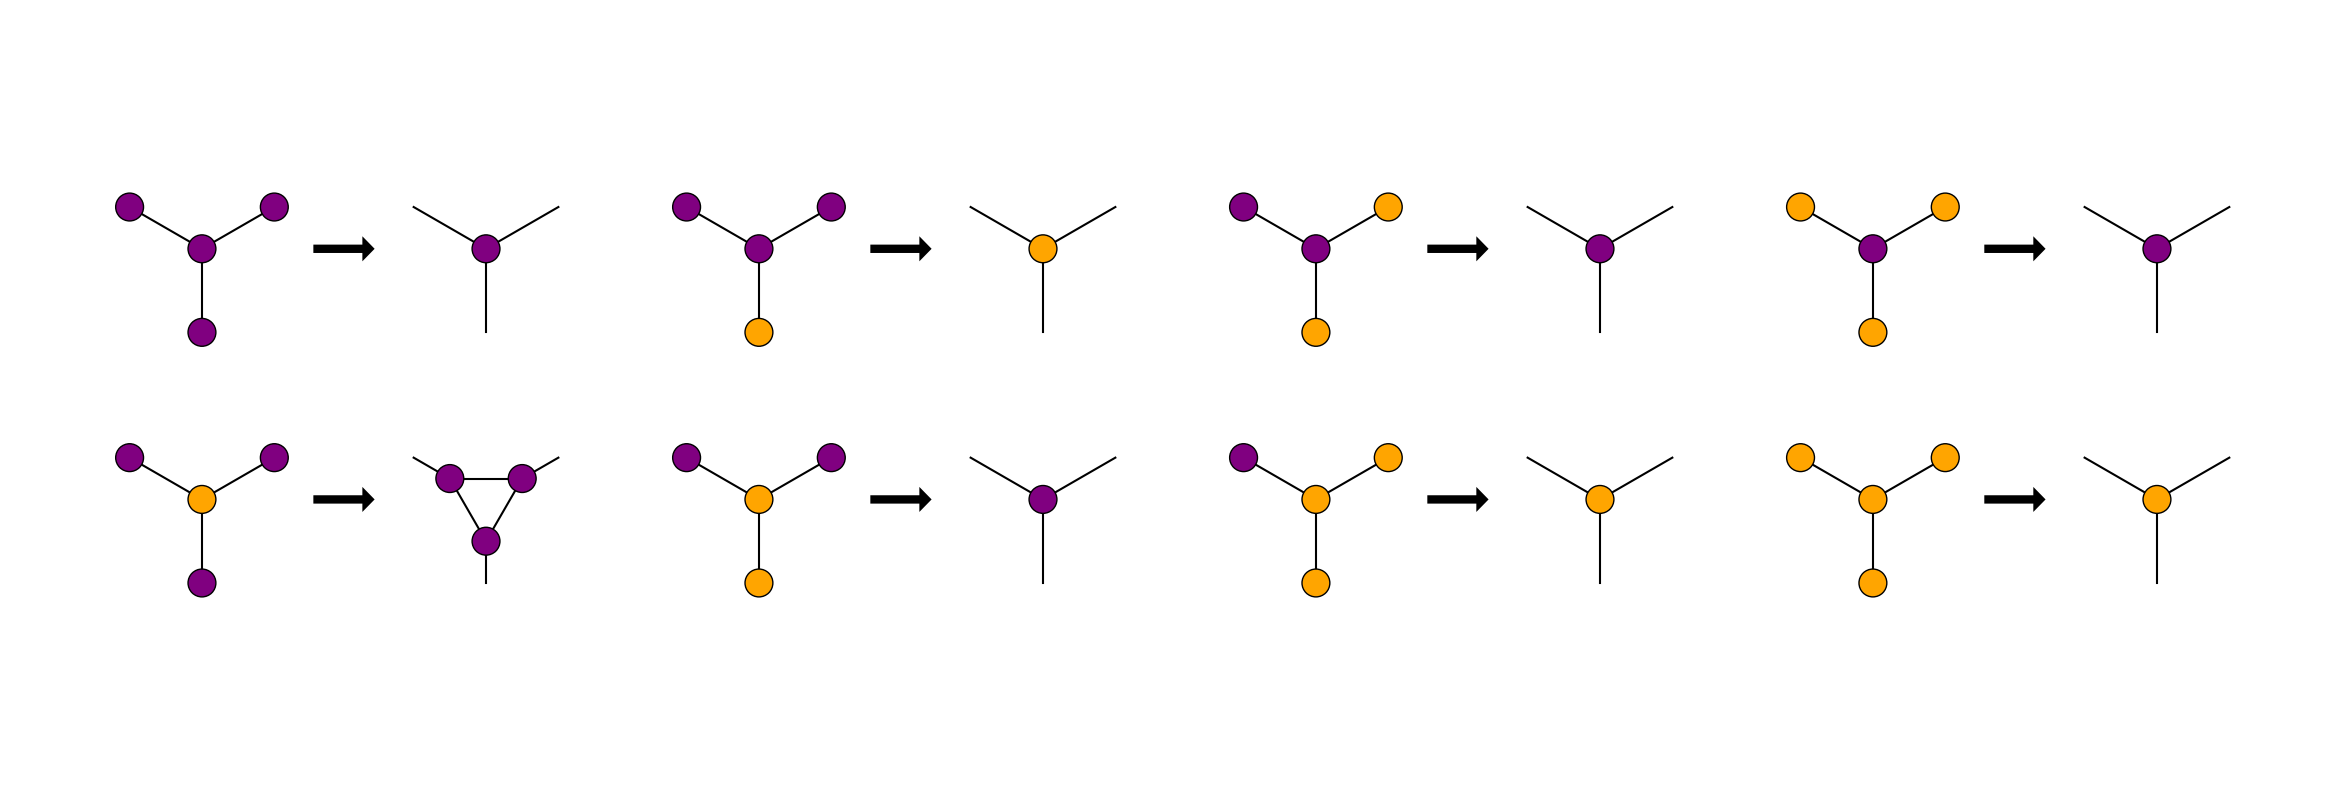

In [18]:
rule2236 = gra.Rule(3,2236)
rule2236.plot()

## Behavior

We can plot the growth of $G_0$ under this rule using `matplotlib`.

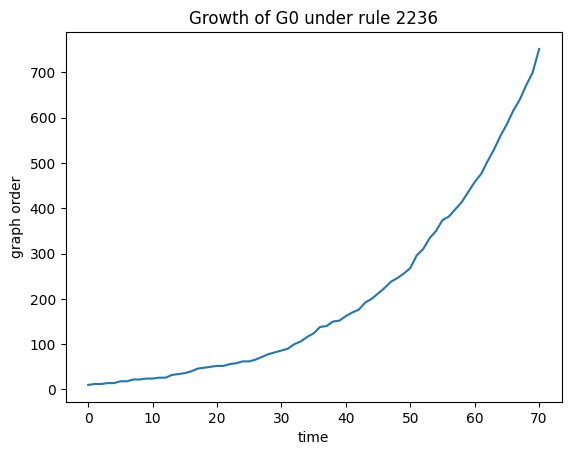

In [19]:
import matplotlib.pyplot as plt

g = g0.clone()
time_max = 70

# initialize the list that will hold the succesive graph orders with the first value
growth = [g.order()]

# loop that evolves the graph then adds the new graph order to the list
for i in range(time_max):
    rule2236(g)
    growth.append(g.order())

# growth plot
plt.plot(growth)
plt.title('Growth of G0 under rule 2236')
plt.xlabel('time')
plt.ylabel('graph order')
plt.show()

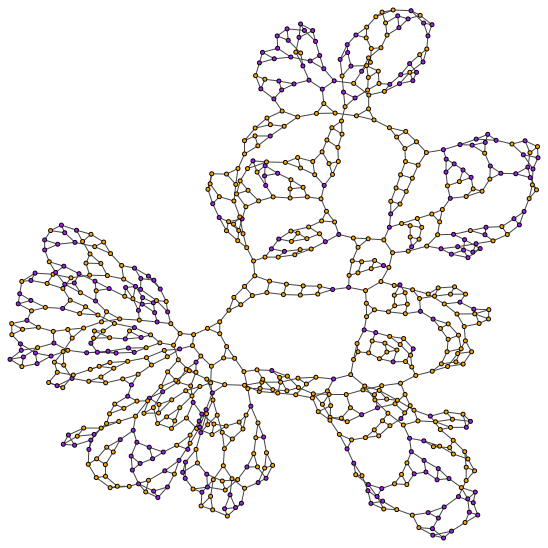

In [20]:
# final graph obtained (t=70)
g.plot()